### Web scraping Youtube rankings

#### Objective:

To create a script that scrapes the most viewed channels from analytics website 'socialblade.com' and exports them to a csv file for further analysis.

In [2]:
#Import necessary libraries
import pandas as pd

import requests  
import urllib.request
from bs4 import BeautifulSoup, NavigableString, Tag
import csv

In [1]:
##channels = soup.find('div', attrs={'style': 'float: right; width: 900px;'}).find_all('div', recursive=False)[4:]
#channels

In [3]:
#Entering the target url to scrape rankings from
rank_page = 'https://socialblade.com/youtube/top/50/mostviewed'
request = urllib.request.Request(rank_page, headers={'User-Agent': 'your user-agent'}) # User agent to tackle the HTML forbidden error

page = urllib.request.urlopen(request)
# Converts into a Beautiful Soup object
soup = BeautifulSoup(page, 'html.parser')

#Give column names for the final csv file
columns=['Channels','Uploads','Views']
lst=[]

x=pd.DataFrame()
 
channels = soup.find('div', attrs={'style': 'float: right; width: 900px;'}).find_all('div', recursive=False)[4:]
 
file = open('topyoutubers.csv', 'w')
writer = csv.writer(file)
 
# write title row
writer.writerow(['Username', 'Uploads', 'Views'])

# Obtain three values of the channel i.e (channel name, number of uploads and total views)
for channel in channels:
    username = channel.find('div', attrs={'style': 'float: left; width: 350px; line-height: 25px;'}).a.text.strip()
    uploads = channel.find('div', attrs={'style': 'float: left; width: 80px;'}).span.text.strip()
    views = channel.find_all('div', attrs={'style': 'float: left; width: 150px;'})[1].span.text.strip()
    
    # Append the string information onto a list
    lst.append([username+'/'+uploads+ '/'+views])
    
    print(username + ' ' + uploads + ' ' + views)
    # Add the channel info to the csv file
    writer.writerow([username.encode('utf-8'), uploads.encode('utf-8'), views.encode('utf-8')])
 
file.close()

T-Series 14,694 125,276,462,076
Cocomelon - Nursery Rhymes 565 77,957,814,444
SET India 41,295 66,454,134,518
Zee TV 97,040 53,537,430,625
WWE 49,825 49,201,607,445
Like Nastya 483 42,776,418,897
Movieclips 36,136 42,463,963,887
Ryan's World 1,811 41,828,978,673
✿ Kids Diana Show 757 39,286,088,643
ABS-CBN Entertainment 147,688 38,586,442,577
netd müzik 13,604 38,472,027,660
SAB TV 26,759 36,870,158,088
El Reino Infantil 940 34,607,715,172
Canal KondZilla 1,543 31,976,354,394
Vlad and Niki 284 31,942,307,297
Zee Music Company 4,986 29,792,774,201
Little Baby Bum - Nursery Rhymes &… 1,294 29,099,644,054
WorkpointOfficial 48,328 27,039,344,232
Wave Music 18,135 26,135,779,968
PewDiePie 4,202 26,044,555,828
ChuChu TV Nursery Rhymes & Kids So… 379 25,727,115,702
Маша и Медведь 825 25,162,207,957
Get Movies 2,943 23,738,174,410
Super Simple Songs - Kids Songs 516 22,863,686,282
Colors TV 42,492 21,942,568,990
JustinBieberVEVO 154 21,036,559,555
Ed Sheeran 161 20,865,809,759
TheEllenShow 12,

In [18]:
# Copy the list contents to a dataframe and split the values
a = pd.DataFrame(lst,columns=['Test'])
df=a.Test.str.split('/',expand=True)
df.columns=(["Channel Name","Uploads","Views"])
df

,Channel Name,Uploads,Views
0,T-Series,"14,694","125,276,462,076"
1,Cocomelon - Nursery Rhymes,565,"77,957,814,444"
2,SET India,"41,295","66,454,134,518"
3,Zee TV,"97,040","53,537,430,625"
4,WWE,"49,825","49,201,607,445"
5,Like Nastya,483,"42,776,418,897"
6,Movieclips,"36,136","42,463,963,887"
7,Ryan's World,"1,811","41,828,978,673"
8,✿ Kids Diana Show,757,"39,286,088,643"
9,ABS-CBN Entertainment,"147,688","38,586,442,577"


In [19]:
#Removing the commas from the columns for easier conversion to string datatype
df.replace(',','', regex=True, inplace=True)

In [20]:
df.head()

,Channel Name,Uploads,Views
0,T-Series,14694,125276462076
1,Cocomelon - Nursery Rhymes,565,77957814444
2,SET India,41295,66454134518
3,Zee TV,97040,53537430625
4,WWE,49825,49201607445


In [21]:
df.dtypes

Channel Name    object
Uploads         object
Views           object
dtype: object

In [23]:
#Converting the two columns (Uploads & Views) from string to numeric
df[['Views','Uploads']] = df[['Views','Uploads']].astype('int64')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
Channel Name    50 non-null object
Uploads         50 non-null int64
Views           50 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


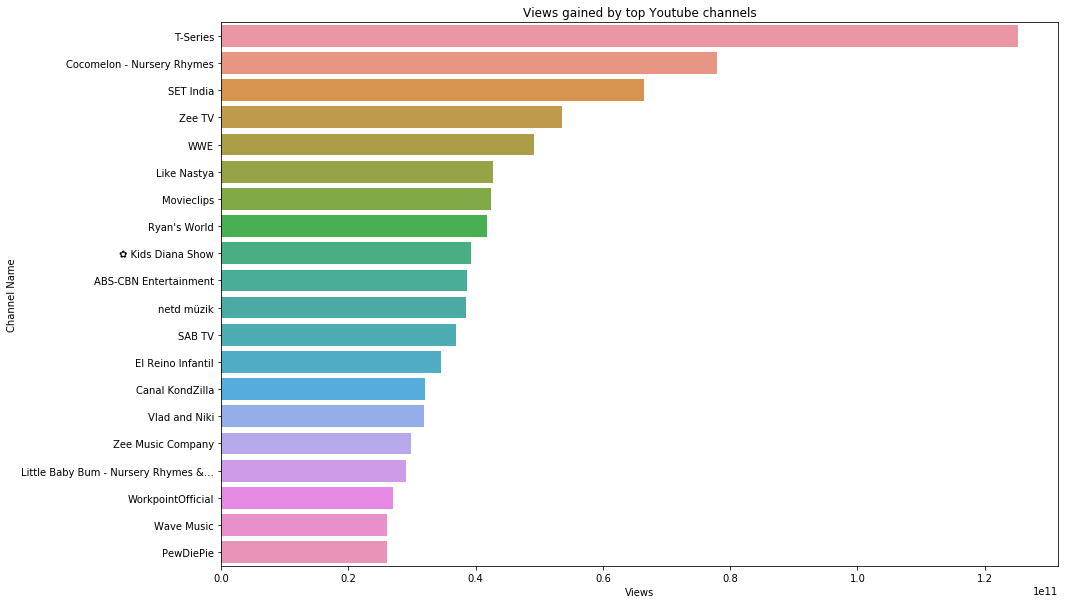

In [10]:
# Plotting the top 20 Youtube channels according to their views obtained
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.title('Views gained by top Youtube channels')

ax=sns.barplot(x='Views',y='Channel Name',data=df.nlargest(20,'Views'))

### References:

1) https://www.youtube.com/watch?v=GjKQ6V_ViQE

2) https://www.youtube.com/watch?v=JfU1G1Ug6-k

3) https://socialblade.com/